# Entanglement entropy in a finite Heisenberg model

In [2]:
using LinearAlgebra, SparseArrays, DelimitedFiles, Plots #,Arpack

#Including the functions to construct a Hamiltonian and calculate the entanglement entropy
include("functions.jl") #MakeHam, RedDens, EntEntr, PopMul, BinDec, FindGS

┌ Info: Recompiling stale cache file /opt/julia/share/julia/site/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


## The singlet

Entanglement of the state $$|\psi>=\alpha|10>+\sqrt{1-\alpha^2}|01>$$ for different $$\alpha\in[0,1]$$

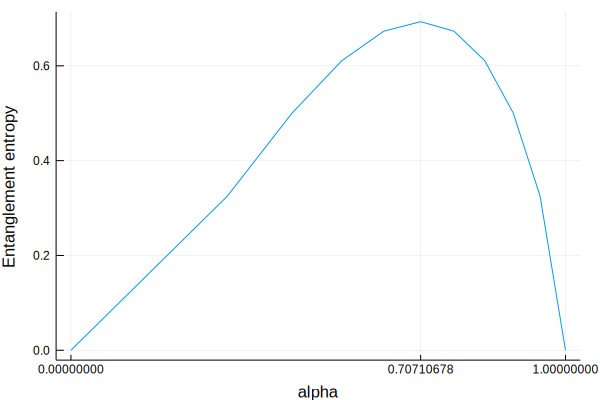

In [3]:
vals=Array{Float64}(undef, 11)

for i in 0:10
    vals[i+1]=EntEntr([0,sqrt(i/10),sqrt(1-(i/10)),0],[2])
end

plot([sqrt(i/10) for i in 0:10],vals,xlabel="alpha", ylabel="Entanglement entropy", 
    label="",xticks=[0,sqrt(1/2),1])

## Entanglement in the chain with $h=0$, N even

The interaction matrices:

In [5]:
function PlotHeis(Jxy,Jz,h,Nu)
    jmat = zeros(Float64, Nu, Nu, 3);
    for a in 1:3
        if a==3
            J=Jz
        else
            J=Jxy
        end

        for i in 1:Int(Nu-1)
            jmat[i,i+1,a]=jmat[i+1,i,a]=J
        end
    end
    ham = Matrix(MakeHam(jmat,Nu,h))
    eigsys = eigen(ham)
    gs=FindGS(eigsys)[:,1]
    vals = Array{Float64}(undef, Nu+1)
    for i in 0:Nu
        vals[i+1]=EntEntr(gs,collect(1:i))
    end
    vals
end
;

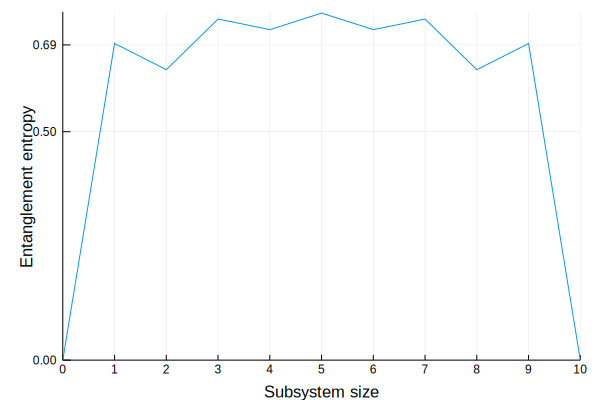

In [6]:
N=10
plot(0:N,PlotHeis(1,1,0,N),
    ylims=(0,1.1log(2)), xlims=(0,N), 
    xlabel="Subsystem size", ylabel="Entanglement entropy", 
    label="", xticks = 0:1:N, yticks = [0,0.5,0.69])

In [24]:
N=8
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=1
    end
end
ham = Matrix(MakeHam(jmat,N,0))
eigsys = eigen(ham)
gs=FindGS(eigsys)[:,1]

subsys = [2,3]

println(string(subsys)*": "*string(EntEntr(gs,subsys)))

[2, 3]: 0.9548755353111784


**Sending Jx, Jy to 0**

In [21]:
N=8
jmat = zeros(Float64, N, N, 3);
for a in 1:3
    for i in 1:Int(N-1)
        jmat[i,i+1,a]=jmat[i+1,i,a]=1
    end
end
#jmat

nop = 10 #number of plots
plotvals = Array{Float64}(undef, N+1, nop)
for i in 1:nop
    plotvals[:,i] = PlotHeis(1-(i-1)/nop,1,0,N)
end
#plot(0:N,plotvals,label="",layout=10)

In [23]:
nop = 10 #number of plots
anim = @animate for i=1:nop
    plot(0:N,PlotHeis(1-(i-1)/nop,1,0,N),ylims=(0,1.07log(2)), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", 
        label="", xticks = 0:1:N, yticks = [0,0.5,0.69])
end
gif(anim, "EntHeisJ-to-0.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /afs/rrz.uni-koeln.de/usr/smail/91/wvanderf/Dokumente/Entanglement-Entropy/EntHeisJ-to-0.gif
└ @ Plots /opt/julia/share/julia/site/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/afs/rrz.uni-koeln.de/usr/smail/91/wvanderf/Dokumente/Entanglement-Entropy/EntHeisJ-to-0.gif")

### Comparing to the Ising model

Degenerate ground state: 
$$
|\psi>=\frac{1}{\sqrt{2}}(|01010101>+|10101010>)
$$

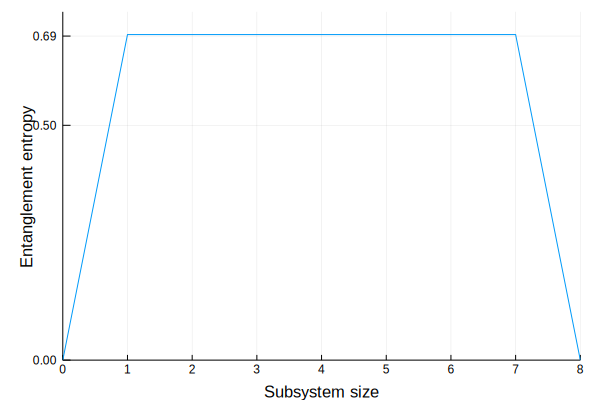

In [28]:
N=8
vals = Array{Float64}(undef, N+1)
state = zeros(Float64, 2^N)
state[85]=state[170]=sqrt(1/2) #the groundstate

for i in 0:N
    vals[i+1]=EntEntr(state,collect(1:i))
end


plot(0:N,vals,ylims=(0,1.07log(2)), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", 
        label="", xticks = 0:1:N, yticks = [0,0.5,0.69])

## Entanglement in a chain with $h\neq0$, N odd

Ground state of Ising model:
$$
|\psi>=|1010101>.
$$
Product state, so zero entanglement entropy.

In [25]:
N=7
nop = 10 #number of plots
anim = @animate for i=1:nop
    plot(0:N,PlotHeis(1-(i-1)/nop,1,1,N),ylims=(0,0.25), xlims=(0,N), 
        xlabel="Subsystem size", ylabel="Entanglement entropy", 
        label="dawhdwa", xticks = 0:1:N, yticks=0:0.05:0.25)
end
gif(anim, "EntHeisJ-to-0_h.gif", fps = 3)

┌ Info: Saved animation to 
│   fn = /afs/rrz.uni-koeln.de/usr/smail/91/wvanderf/Dokumente/Entanglement-Entropy/EntHeisJ-to-0_h.gif
└ @ Plots /opt/julia/share/julia/site/packages/Plots/47Tik/src/animation.jl:90


Plots.AnimatedGif("/afs/rrz.uni-koeln.de/usr/smail/91/wvanderf/Dokumente/Entanglement-Entropy/EntHeisJ-to-0_h.gif")